In [82]:
import tensorflow as tf 
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Input,Dropout,Conv2DTranspose,concatenate
import matplotlib.pyplot as plt
from tensorflow.keras import  layers

from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
import os

In [83]:
ls '/home/tazmeen/Documents/LAB_FINAL/dataset'

daisy/  dandelion/  roses/  sunflowers/  tulips/


In [84]:

data_dir = 'dataset/'
IMG_SIZE = (28,28)
BATCH_SIZE = 64
SEED = 42

# 70% 
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.30,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

# 30% 
valtest_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.30,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

Found 2746 files belonging to 5 classes.
Using 1923 files for training.
Found 2746 files belonging to 5 classes.
Using 823 files for validation.


In [85]:

valtest_batches = tf.data.experimental.cardinality(valtest_ds).numpy()
test_batches = valtest_batches // 3 
test_ds = valtest_ds.take(test_batches)
val_ds  = valtest_ds.skip(test_batches)

val_ds  = valtest_ds.skip(test_batches)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

rescale = tf.keras.layers.Rescaling(1./255)

# augmentation 
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
val_ds   = val_ds.map(lambda x, y: (rescale(x), y))
test_ds  = test_ds.map(lambda x, y: (rescale(x), y))



In [86]:
model = Sequential([
   
    Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
   
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
   
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), 
    Dense(5, activation='softmax')
])

model.summary()


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_75 (Conv2D)              │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,405 (431.27 KB)

 Trainable params: 110,405 (431.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5596 - loss: 1.0813 - val_accuracy: 0.5397 - val_loss: 1.1470
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5614 - loss: 1.0869 - val_accuracy: 0.5026 - val_loss: 1.1631
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5654 - loss: 1.0370 - val_accuracy: 0.4762 - val_loss: 1.2149
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5782 - loss: 1.0060 - val_accuracy: 0.3968 - val_loss: 1.6237
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5870 - loss: 1.0206 - val_accuracy: 0.4956 - val_loss: 1.2247
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6032 - loss: 0.9862 - val_accuracy: 0.5538 - val_loss: 1.0881
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5845 - loss: 0.9945 - val_accuracy: 0.4462 - val_loss: 1.4974
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5898 - loss: 0.9893 - val_accuracy: 0.4850 - val_loss: 1.

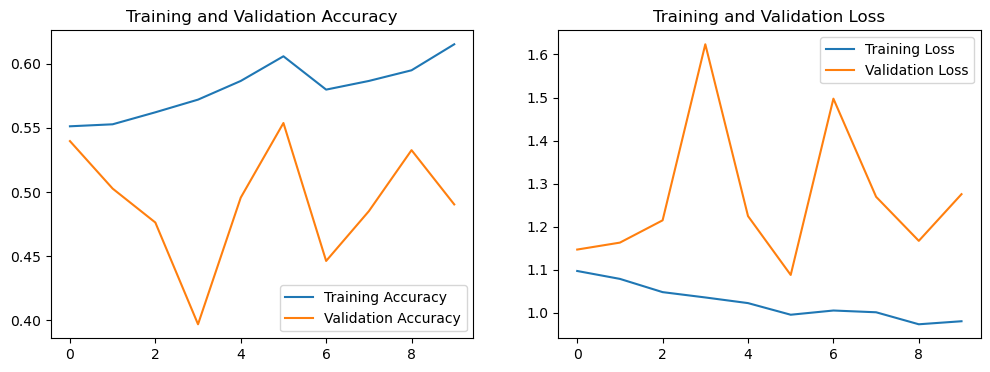

In [90]:




model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



EPOCHS = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)



acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [91]:
model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5005 - loss: 1.2718


[1.2857699394226074, 0.484375]

In [101]:
def build_unet():
    inputs = Input(shape =(128,128,3))
      
    # Encoder
    #Conv Layer 1
    c1 = Conv2D(64, (3,3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2,2))(c1)
    
    #Conv Layer 2
    c2 = Conv2D(128, (3,3), activation='relu', padding='same')(p1)
    p2 = MaxPooling2D((2,2))(c1)

    #bottleneck
    c3 = Conv2D(128,(3,3),activation='relu', padding='same')(p2)
    
    #Decoder
    
    u1 = Conv2DTranspose(c2,(2,2), strides=(2,2), padding='same')(c3)
    skip1 = concatenate([u1, c1])
    c6 = Conv2D(128, (3,3), activation='relu', padding='same')(u1)
  
    
    u7 = Conv2DTranspose(256, (2,2), strides=(2,2), padding='same')(c6)
    u7 = concatenate([u7, c2])
    c7 = Conv2D(256, (3,3), activation='relu', padding='same')(u7)
    
    output = Conv2D(1,(1,1),activation='sigmoid')
    
    return output


